# Target
Comparison of standard PyTorch optimizers with various modifications of the new optimizer when training a simple neural network

## libraries

In [1]:
import torch
from torch import optim
from torch import nn
from torch.utils.data import DataLoader
from torchmetrics import R2Score

# graphics
import matplotlib.pyplot as plt

# implementation
from tools import make_regression_data, RegressionDataset, training_model, standard_training
from optimizers import DREMOptimizer

torch.random.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
def plot_results(loss_train, loss_test, score_test):
    """help function to visualize results"""
    plt.figure(figsize=(18, 7))
    plt.subplot(1, 2, 1)
    plt.plot(loss_train, c='r', label='train')
    plt.plot(loss_test, c='b', label='test')
    plt.title('Loss function')
    plt.xlabel('epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(score_test)
    plt.title('R2-score on test set')
    plt.xlabel('epoch')

## Data

In [3]:
NUMBER_OF_FEATURES = 10
X_train, X_test, y_train, y_test = make_regression_data(number_samples=1000,
                                                        number_features=NUMBER_OF_FEATURES,
                                                        noise_value=5.5)
print(f'shape of train: {X_train.shape, y_train.shape}\nshape of test: {X_test.shape, y_test.shape}')

shape of train: (torch.Size([800, 10]), torch.Size([800, 1]))
shape of test: (torch.Size([200, 10]), torch.Size([200, 1]))


In [4]:
train_dataset = RegressionDataset(features=X_train,
                                  labels=y_train)
test_dataset = RegressionDataset(features=X_test,
                                 labels=y_test)
print(f'example of train sample:\n {train_dataset[19]}')

example of train sample:
 (tensor([-0.7738,  0.7570, -1.7787, -1.2447,  0.8696, -0.9222,  1.4960,  1.3556,
         1.8768,  0.4134]), tensor([10.8430]))


In [5]:
BATCH_SIZE = 50

train_dataloader = DataLoader(dataset=train_dataset,
                              shuffle=True,
                              batch_size=BATCH_SIZE)
test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=BATCH_SIZE)
batch_example_features, batch_example_labels  = next(iter(train_dataloader))
print('shape of batch: features - {} and labels - {}'.format(batch_example_features.shape, batch_example_labels.shape))

shape of batch: features - torch.Size([50, 10]) and labels - torch.Size([50, 1])


## Optimizers & loss function & metric

In [6]:
loss_fn = nn.MSELoss()

metric_fn = R2Score()

## 1. Simple perceptron


## 1.1 Adam optimizer
Firstly, we train 1-layer perceptron with Adam optimizer (learning rate = 0.1) and try to achieve **R2-score=0.95**

In [7]:
simple_model = nn.Sequential(nn.Linear(in_features=10, out_features=1, bias=False))

# how many epochs we need to achieve 0.95 score?
n_epochs, train_loss, test_loss, test_score = standard_training(model=simple_model,
                                                                optimizer_fn=optim.Adam,
                                                                loss_fn=loss_fn,
                                                                metric_fn=metric_fn,
                                                                data_train=train_dataloader,
                                                                data_test=test_dataloader,
                                                                learning_rate=0.1,
                                                                printed=True,
                                                                current_device=device)

epoch 1: loss = 16174.674 and score = 0.025
epoch 2: loss = 15345.459 and score = 0.075
epoch 3: loss = 14543.254 and score = 0.124
epoch 4: loss = 13796.152 and score = 0.169
epoch 5: loss = 13081.415 and score = 0.213
epoch 6: loss = 12404.828 and score = 0.254
epoch 7: loss = 11771.184 and score = 0.292
epoch 8: loss = 11151.865 and score = 0.329
epoch 9: loss = 10582.747 and score = 0.364
epoch 10: loss = 10006.848 and score = 0.398
epoch 11: loss = 9481.191 and score = 0.430
epoch 12: loss = 8974.008 and score = 0.461
epoch 13: loss = 8497.041 and score = 0.489
epoch 14: loss = 8051.910 and score = 0.516
epoch 15: loss = 7622.295 and score = 0.542
epoch 16: loss = 7212.104 and score = 0.567
epoch 17: loss = 6819.575 and score = 0.590
epoch 18: loss = 6443.269 and score = 0.613
epoch 19: loss = 6082.805 and score = 0.635
epoch 20: loss = 5747.888 and score = 0.655
epoch 21: loss = 5422.382 and score = 0.674
epoch 22: loss = 5115.359 and score = 0.693
epoch 23: loss = 4820.027 and s

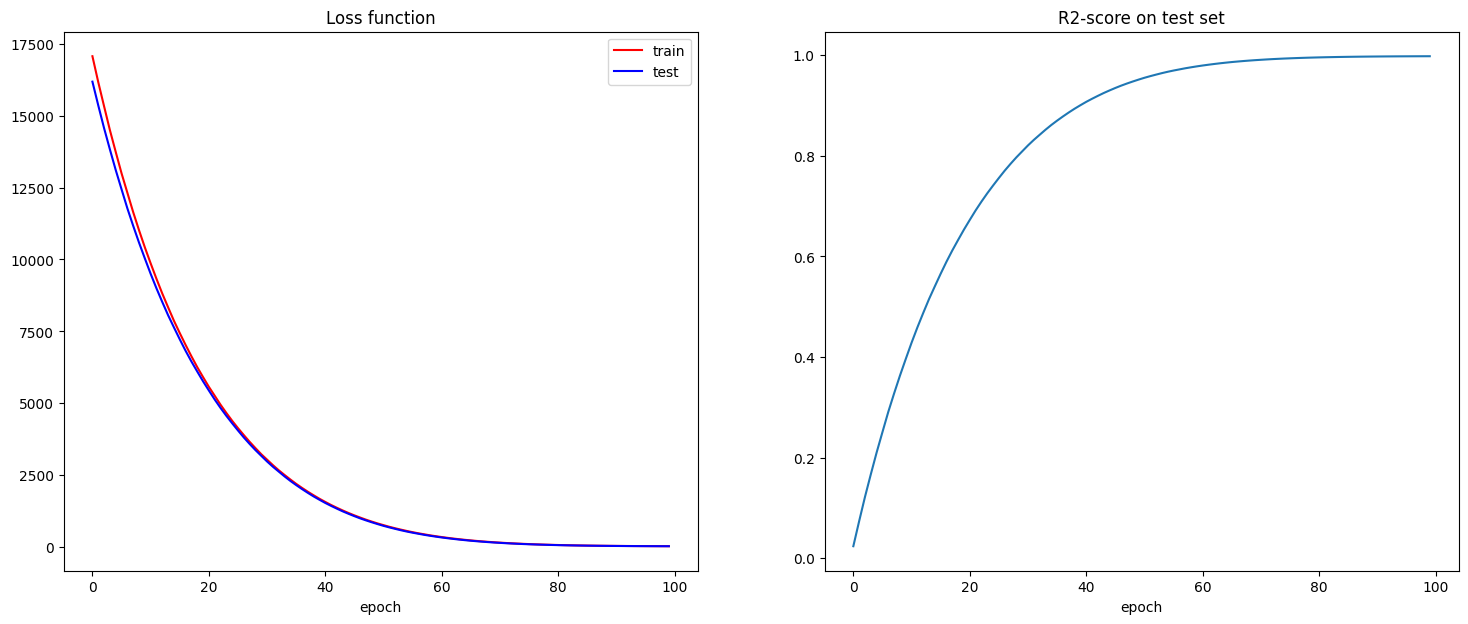

In [10]:
plot_results(train_loss, test_loss, test_score)

Secondly, we train 1-layer perceptron with Adam optimizer (learning rate = 0.1) **for 100 epochs**

In [8]:
simple_model = nn.Sequential(nn.Linear(in_features=10, out_features=1, bias=False))

train_loss, test_loss, test_score = standard_training(model=simple_model,
                                                      optimizer_fn=optim.Adam,
                                                      loss_fn=loss_fn,
                                                      metric_fn=metric_fn,
                                                      data_train=train_dataloader,
                                                      data_test=test_dataloader,
                                                      learning_rate=0.1,
                                                      epochs=100,
                                                      current_device=device)

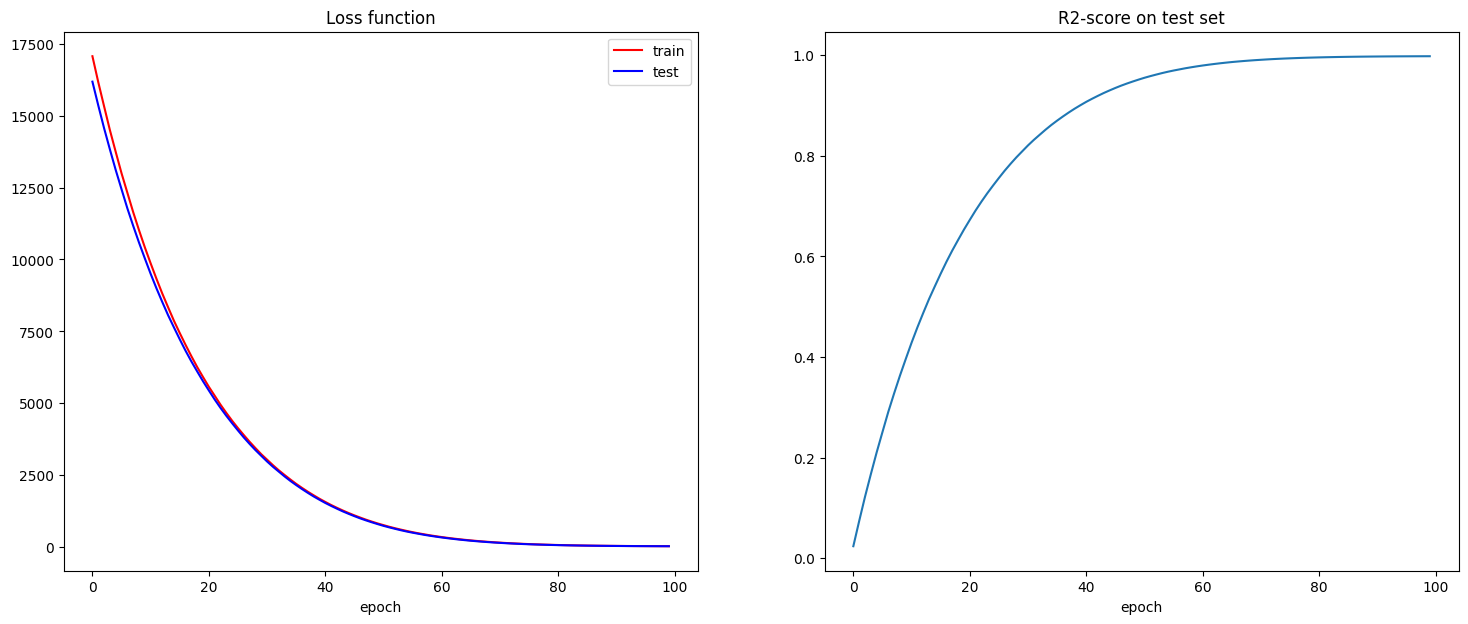

In [9]:
plot_results(train_loss, test_loss, test_score)

## 1.2 SGD optimizer
Train 1-layer perceptron with SGD optimizer (learning rate = 0.01) and try to achieve **R2-score=0.95**

In [15]:
simple_model = nn.Linear(in_features=10, out_features=1, bias=False)

# how many epochs we need to achieve 0.95 score?
n_epochs, train_loss, test_loss, test_score = standard_training(model=simple_model,
                                                                optimizer_fn=optim.SGD,
                                                                loss_fn=loss_fn,
                                                                metric_fn=metric_fn,
                                                                data_train=train_dataloader,
                                                                data_test=test_dataloader,
                                                                learning_rate=0.01,
                                                                printed=True,
                                                                current_device=device)

epoch 1: loss = 9119.109 and score = 0.450
epoch 2: loss = 4903.032 and score = 0.704
epoch 3: loss = 2653.222 and score = 0.840
epoch 4: loss = 1447.902 and score = 0.912
epoch 5: loss = 798.029 and score = 0.952


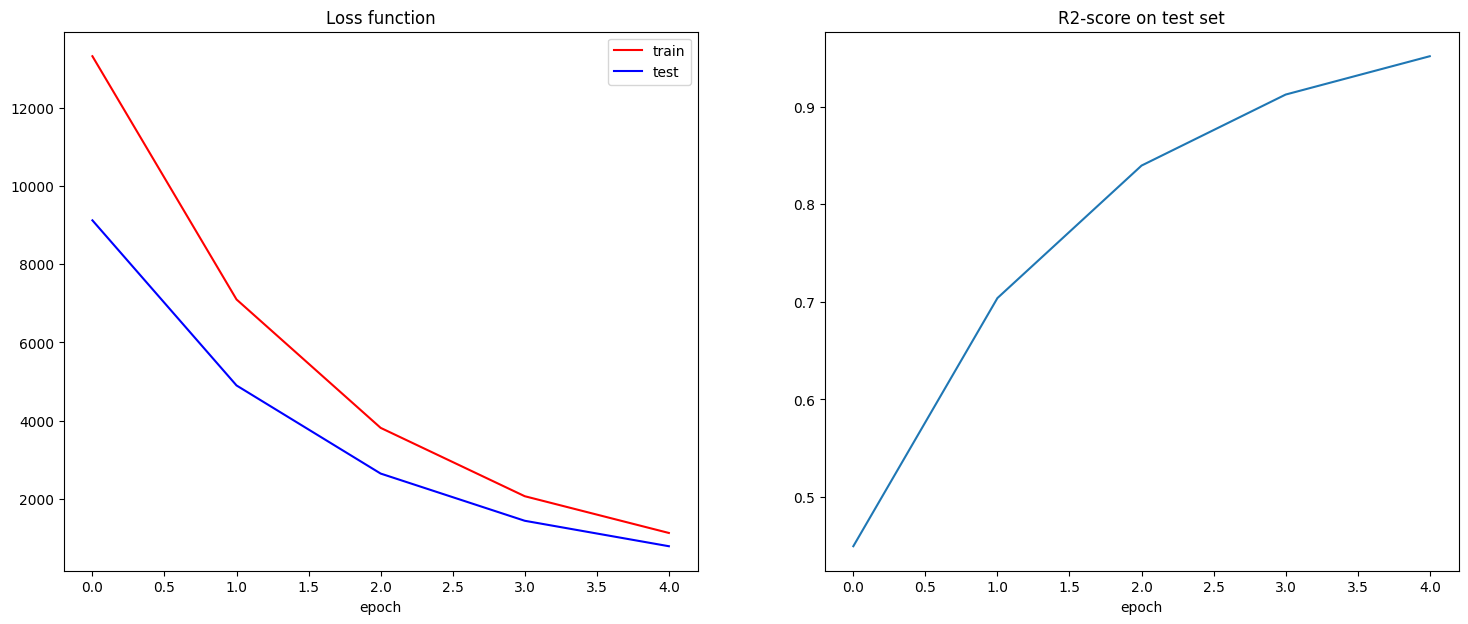

In [16]:
plot_results(train_loss, test_loss, test_score)

Train 1-layer perceptron with SGD optimizer (learning rate = 0.01) **for 100 epochs**

In [17]:
simple_model = nn.Linear(in_features=10, out_features=1, bias=False)

train_loss, test_loss, test_score = standard_training(model=simple_model,
                                                      optimizer_fn=optim.SGD,
                                                      loss_fn=loss_fn,
                                                      metric_fn=metric_fn,
                                                      data_train=train_dataloader,
                                                      data_test=test_dataloader,
                                                      learning_rate=0.01,
                                                      epochs=100,
                                                      current_device=device)

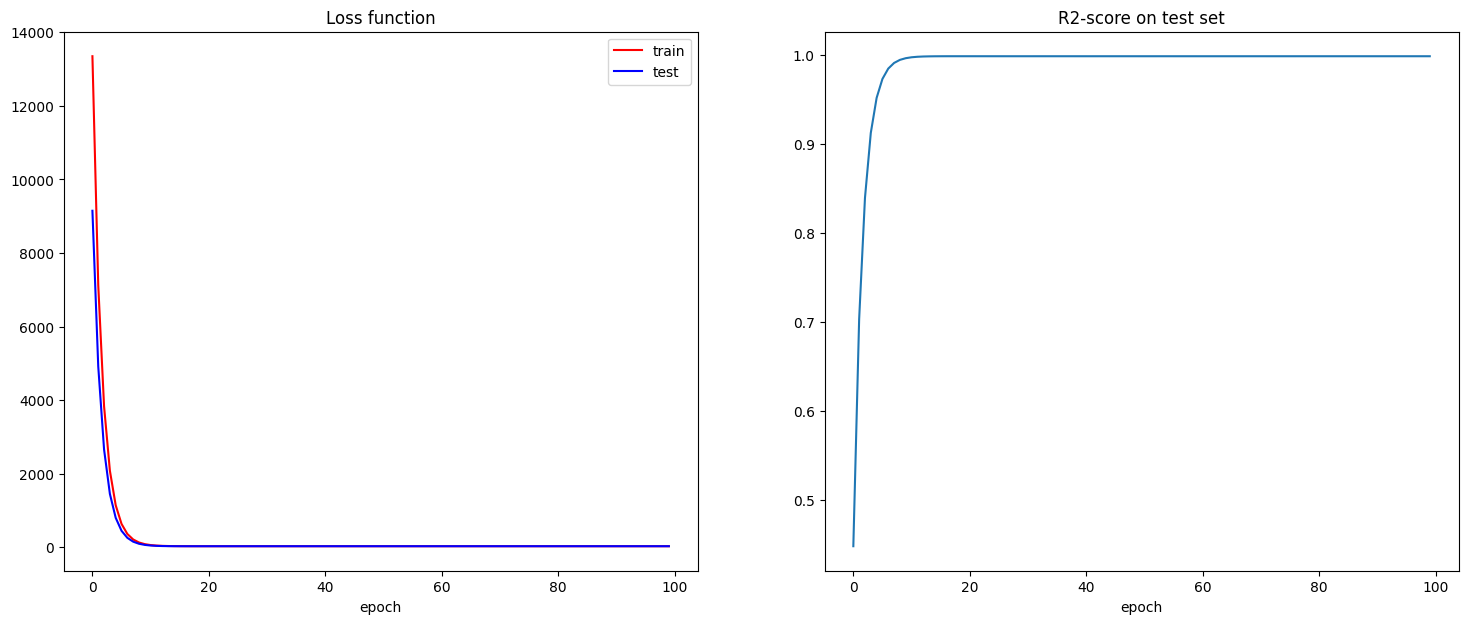

In [18]:
plot_results(train_loss, test_loss, test_score)

## 1.3 DREM optimizer
Train 1-layer perceptron with DREM optimizer (learning rate = 0.01) and try to achieve **R2-score=0.95**

In [16]:
simple_model = nn.Linear(in_features=10, out_features=1, bias=False)

n_epochs, train_loss, test_loss, test_score = training_model(model=simple_model,
                                                             optimizer_fn=DREMOptimizer,
                                                             loss_fn=loss_fn,
                                                             metric_fn=metric_fn,
                                                             data_train=train_dataloader,
                                                             data_test=test_dataloader,
                                                             learning_rate=0.01,
                                                             printed=True,
                                                             valid_period=1,
                                                             with_addition=True,
                                                             new_optim=True,
                                                             current_device=device)

epoch 1: loss = 3044.102 and score = 0.816
epoch 2: loss = 452.655 and score = 0.972


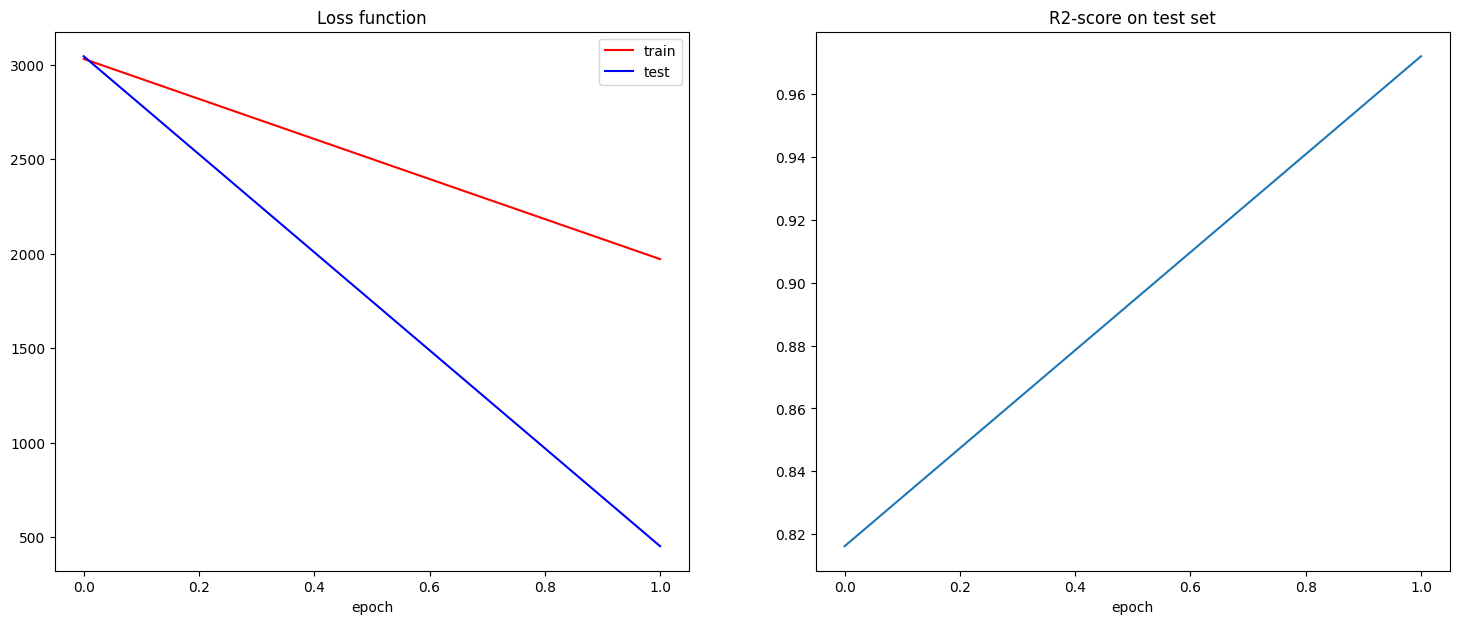

In [17]:
plot_results(train_loss, test_loss, test_score)

Train 1-layer perceptron with DREM optimizer (learning rate = 0.01) **for 100 epochs**

In [18]:
simple_model = nn.Linear(in_features=10, out_features=1, bias=False)

train_loss, test_loss, test_score = training_model(model=simple_model,
                                                   optimizer_fn=DREMOptimizer,
                                                   loss_fn=loss_fn,
                                                   metric_fn=metric_fn,
                                                   data_train=train_dataloader,
                                                   data_test=test_dataloader,
                                                   learning_rate=0.01,
                                                   epochs=100,
                                                   valid_period=1,
                                                   with_addition=True,
                                                   new_optim=True,
                                                   current_device=device)

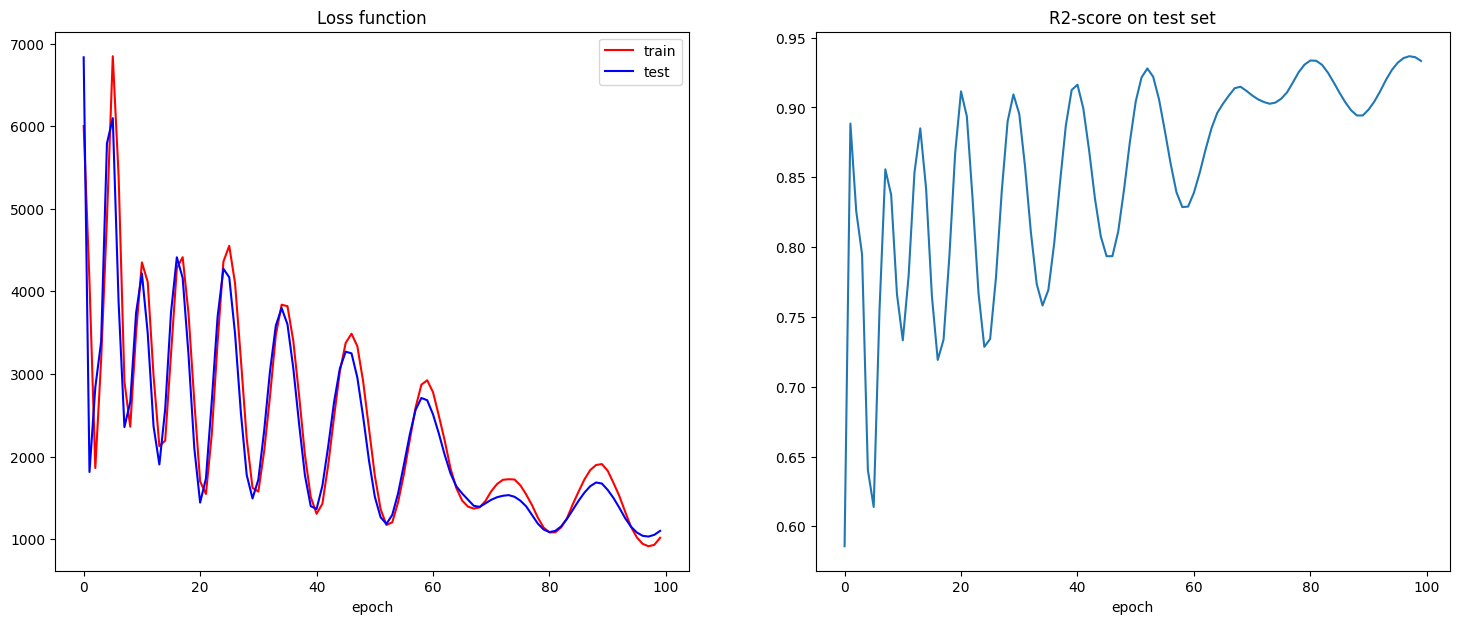

In [19]:
plot_results(train_loss, test_loss, test_score)

## 2. Non-classic MSE (loss function) with classic optimizers
At this topic we try to use non-classic MSE loss function (see image below) when training a simple model


![new loss](../report/new_loss.png)

To use it feature we need to change BATCH_SIZE (should be equal to number of neurons in the first layer)

In [21]:
train_dataloader = DataLoader(dataset=train_dataset,
                              shuffle=True,
                              batch_size=NUMBER_OF_FEATURES)
test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=NUMBER_OF_FEATURES)
batch_example_features, batch_example_labels  = next(iter(train_dataloader))
print('shape of batch: features - {} and labels - {}'.format(batch_example_features.shape, batch_example_labels.shape))

shape of batch: features - torch.Size([10, 10]) and labels - torch.Size([10, 1])


In [37]:
optimizers = [optim.Adam, optim.SGD, optim.Adagrad, optim.RMSprop]
learning_rates = [0.1, 1e-7, 100, 0.1]

In [38]:
for optimizer, lr in zip(optimizers, learning_rates):
    simple_model = nn.Linear(in_features=10, out_features=1, bias=False)

    n_epochs, train_loss, test_loss, test_score = training_model(model=simple_model,
                                                                 optimizer_fn=optimizer,
                                                                 loss_fn=loss_fn,
                                                                 metric_fn=metric_fn,
                                                                 data_train=train_dataloader,
                                                                 data_test=test_dataloader,
                                                                 learning_rate=lr,
                                                                 with_addition=True,
                                                                 current_device=device)
    print(f'{optimizer.__name__} need {n_epochs} epochs to achieve R2-score = {test_score[-1]:.3f}')

Adam need 40 epochs to achieve R2-score = 0.951
SGD need 2 epochs to achieve R2-score = 0.991
Adagrad need 2 epochs to achieve R2-score = 0.990
RMSprop need 32 epochs to achieve R2-score = 0.959


Also we can check how many epochs need new optimizer for this task (note: we change batch size)

In [40]:
simple_model = nn.Linear(in_features=10, out_features=1, bias=False)

n_epochs, train_loss, test_loss, test_score = training_model(model=simple_model,
                                                             optimizer_fn=DREMOptimizer,
                                                             loss_fn=loss_fn,
                                                             metric_fn=metric_fn,
                                                             data_train=train_dataloader,
                                                             data_test=test_dataloader,
                                                             learning_rate=0.01,
                                                             printed=True,
                                                             valid_period=1,
                                                             with_addition=True,
                                                             new_optim=True,
                                                             current_device=device)
print(f'DREM optimizer need {n_epochs} epochs to achieve R2-score = {test_score[-1]:.3f}')

epoch 1: loss = 1190.389 and score = 0.915
epoch 2: loss = 3107.336 and score = 0.768
epoch 3: loss = 25440.533 and score = -0.918
epoch 4: loss = 150.719 and score = 0.988
DREM optimizer need 5 epochs to achieve R2-score = 0.988


## 3. More complex model
At this topic we try to train more complex model


## 3.1 Adam

In [47]:
simple_model = nn.Sequential(
    nn.Linear(in_features=10, out_features=15),
    nn.ELU(),
    nn.Linear(in_features=15, out_features=1),
)

n_epochs, train_loss, test_loss, test_score = training_model(model=simple_model,
                                                             optimizer_fn=optim.Adam,
                                                             loss_fn=loss_fn,
                                                             metric_fn=metric_fn,
                                                             data_train=train_dataloader,
                                                             data_test=test_dataloader,
                                                             learning_rate=0.1,
                                                             current_device=device)

print()
print(f'Adam need {n_epochs} epochs for {test_score[-1]:.3f} score')


Adam need 2 epochs for 0.969 score


## 3.2 SGD

In [50]:
simple_model = nn.Sequential(
    nn.Linear(in_features=10, out_features=15),
    nn.ELU(),
    nn.Linear(in_features=15, out_features=1),
)

n_epochs, train_loss, test_loss, test_score = training_model(model=simple_model,
                                                             optimizer_fn=optim.SGD,
                                                             loss_fn=loss_fn,
                                                             metric_fn=metric_fn,
                                                             data_train=train_dataloader,
                                                             data_test=test_dataloader,
                                                             learning_rate=0.001,
                                                             current_device=device)

print()
print(f'SGD need {n_epochs} epochs for {test_score[-1]:.3f} score')


SGD need 2 epochs for 0.975 score


## 3.3 DREM optimizer

In [51]:
simple_model = nn.Sequential(
    nn.Linear(in_features=10, out_features=15, bias=False),
    nn.ReLU(),
    nn.Linear(in_features=15, out_features=1, bias=False),
)

n_epochs, train_loss, test_loss, test_score = training_model(model=simple_model,
                                                             optimizer_fn=DREMOptimizer,
                                                             loss_fn=loss_fn,
                                                             metric_fn=metric_fn,
                                                             data_train=train_dataloader,
                                                             data_test=test_dataloader,
                                                             learning_rate=1e-10,
                                                             current_device=device,
                                                             new_optim=True,
                                                             with_addition=True)

print()
print(f'New optimizer need {n_epochs} epochs for {test_score[-1]:.3f} score')


New optimizer need 21 epochs for 0.962 score
